# clase que implementa una red predictiva

In [1]:
import PredictiveNet

Using TensorFlow backend.


### Red creada de forma manual

In [237]:
pn0 = PredictiveNet.PredictiveNet('pn0',
                    loopback_window=24, 
                    forward_window=4, 
                    num_lstm_layer=3, 
                    num_lstm_cells=128, 
                    num_dense_layers=0,
                    num_dense_cells=0,
                    batch_size=32,
                    suffle_enable=True)


         DATE      TIME    OPEN    HIGH     LOW   CLOSE  TICKVOL  VOL  SPREAD
0  2001.01.01  00:00:00  0.9421  0.9423  0.9419  0.9419        5    0      50
1  2001.01.01  08:00:00  0.9422  0.9424  0.9422  0.9424        2    0      50
2  2001.01.01  14:00:00  0.9425  0.9425  0.9425  0.9425        1    0      50
3  2001.01.01  15:00:00  0.9419  0.9419  0.9419  0.9419        1    0      50
4  2001.01.01  18:00:00  0.9397  0.9399  0.9390  0.9395       20    0      50 
--------------------------
         DATE      TIME    OPEN    HIGH     LOW   CLOSE  TICKVOL  VOL  SPREAD  \
0  2001.01.01  00:00:00  0.9421  0.9423  0.9419  0.9419        5    0      50   
1  2001.01.01  08:00:00  0.9422  0.9424  0.9422  0.9424        2    0      50   
2  2001.01.01  14:00:00  0.9425  0.9425  0.9425  0.9425        1    0      50   
3  2001.01.01  15:00:00  0.9419  0.9419  0.9419  0.9419        1    0      50   
4  2001.01.01  18:00:00  0.9397  0.9399  0.9390  0.9395       20    0      50   

            times

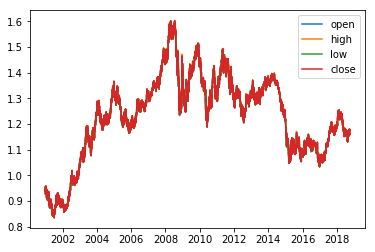

In [238]:
pn0.df = pn0.load_hist('EURUSD_H1.csv', sep=';', reindex_fillna=True, plot_it=True, debug_it=True)                

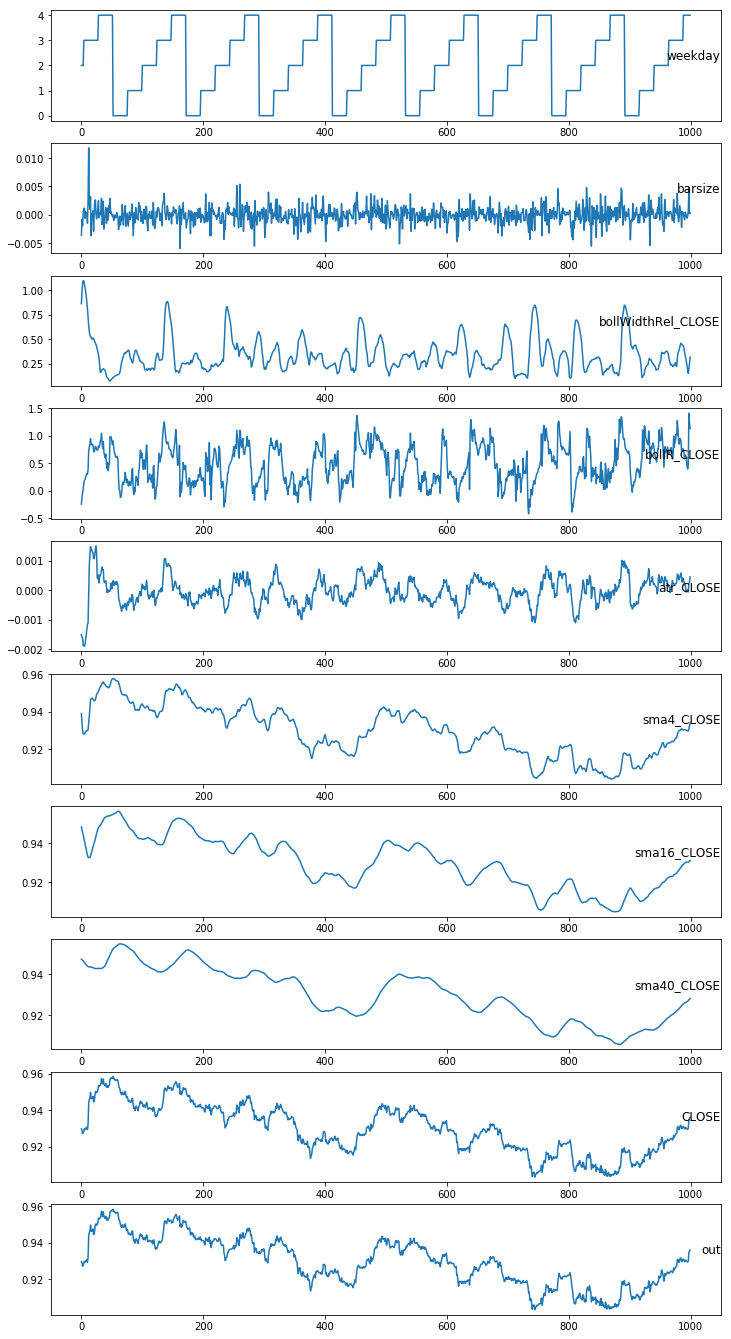

In [226]:
pn0.dfapp = pn0.add_indicators( pn0.df,
                                'out',
                                ['CLOSE'], 
                                ['weekday', 'barsize'], 
                                ['weekday'], 
                                ['bollWidthRel', 'bollR', 'atr', 'SMAx3'], 
                                remove_weekends=True, 
                                add_applied=True, 
                                plot_it=True, 
                                starts=0, 
                                plot_len=1000)


In [227]:

pn0.num_outputs = 1
pn0.num_inputs = pn0.dfapp.shape[1] - pn0.num_outputs
pn0.sts_df = pn0.series_to_supervised(pn0.dfapp, pn0.num_inputs, pn0.num_outputs, pn0.lbw, pn0.fww)


In [229]:
pn0.sts_scaled, pn0.scaler = pn0.normalize_data(pn0.sts_df)


In [230]:
pn0.x_train, pn0.y_train, pn0.x_validation, pn0.y_validation, pn0.x_test, pn0.y_test = pn0.prepare_training_data(pn0.sts_scaled, pn0.bs, 4, 1, 0.8, True)


Total samples...............  111026
Train-Validate samples......  88800
Num blocks..................  555
Train per block.............  128
Validate per block..........  32
Total trains................  71040
Total validates.............  17760
x_train shape: (71040, 192)
y_train shape: (71040, 4)
x_validation shape: (17760, 192)
y_validation shape: (17760, 4)
x_test shape: (22226, 192)
y_test shape: (22226, 4)


In [231]:
pn0.model, pn0.callbacks_list = pn0.build_net(True) 

file "pn0_fitlog.csv" updated
Loaded weights from file:  pn0_weights.hd5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 24, 128)           70144     
_________________________________________________________________
dropout_40 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 24, 128)           131584    
_________________________________________________________________
dropout_41 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
den

Train on 71040 samples, validate on 17760 samples
Epoch 1/1
 - 83s - loss: 8.2839e-04 - acc: 0.2633 - val_loss: 2.9088e-04 - val_acc: 0.2303


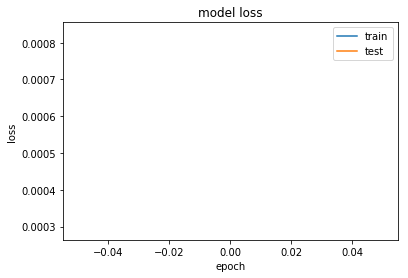

In [156]:
# Entreno la red
pn0.train_validate(1, True)

Model Loss:  0.0005423867323745167
Model Accuracy: 29.84%


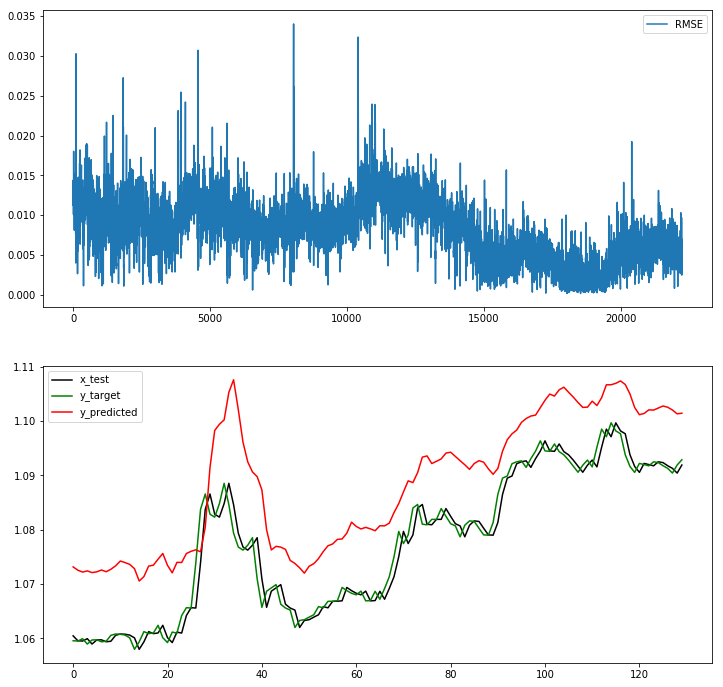

In [146]:
# Testeo la red
pn0.test_rmse()

[1.05623 1.05594 1.05706 1.05623] [1.0508903 1.0507207 1.0509071 1.0508868]
[1.06141 1.06143 1.06161 1.06363] [1.051497  1.0513275 1.0515119 1.0514927]
[1.05969 1.05972 1.05936 1.05946] [1.052383  1.0522151 1.0523992 1.0523796]
[1.05935 1.06123 1.06086 1.06098] [1.04895   1.0487815 1.0489675 1.048945 ]
[1.06563 1.06557 1.07391 1.08374] [1.0557048 1.0555382 1.0557193 1.0557019]
[1.07935 1.07679 1.07623 1.07713] [1.0958016 1.0956752 1.0958544 1.0958387]
[1.06627 1.06557 1.06519 1.06199] [1.059651  1.0594925 1.0596963 1.0596689]


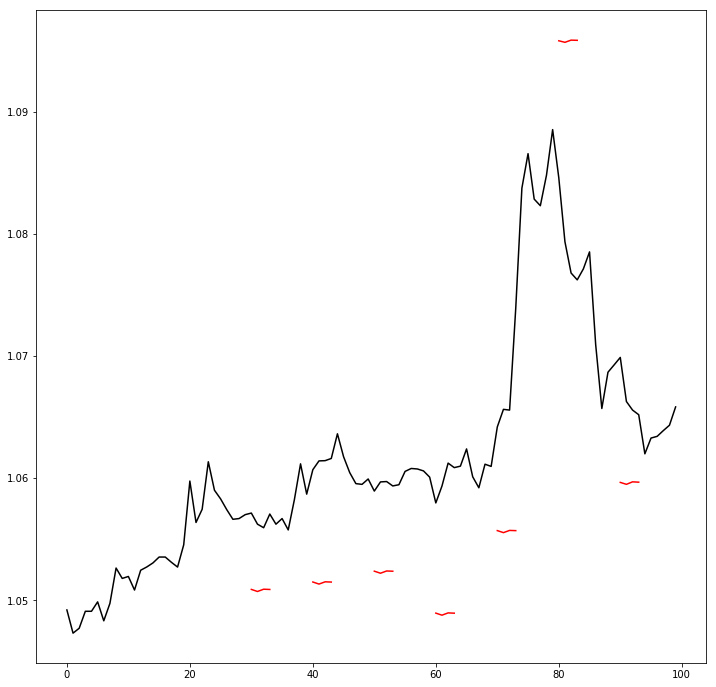

In [157]:
# Hago test con predicciones
pn0.test_with_predictions()

sample 1 de 100


C:\Users\raulm\Programas\anaconda3\envs\keras\lib\site-packages\ipykernel\__main__.py:782: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



sample 2 de 100
sample 3 de 100
sample 4 de 100
sample 5 de 100
sample 6 de 100
sample 7 de 100
sample 8 de 100
sample 9 de 100
sample 10 de 100
sample 11 de 100
sample 12 de 100
sample 13 de 100
sample 14 de 100
sample 15 de 100
sample 16 de 100
sample 17 de 100
sample 18 de 100
sample 19 de 100
sample 20 de 100
sample 21 de 100
sample 22 de 100
sample 23 de 100
sample 24 de 100
sample 25 de 100
sample 26 de 100
sample 27 de 100
sample 28 de 100
sample 29 de 100
sample 30 de 100
sample 31 de 100
sample 32 de 100
sample 33 de 100
sample 34 de 100
sample 35 de 100
sample 36 de 100
sample 37 de 100
sample 38 de 100
sample 39 de 100
sample 40 de 100
sample 41 de 100
sample 42 de 100
sample 43 de 100
sample 44 de 100
sample 45 de 100
sample 46 de 100
sample 47 de 100
sample 48 de 100
sample 49 de 100
sample 50 de 100
sample 51 de 100
sample 52 de 100
sample 53 de 100
sample 54 de 100
sample 55 de 100
sample 56 de 100
sample 57 de 100
sample 58 de 100
sample 59 de 100
sample 60 de 100
sampl

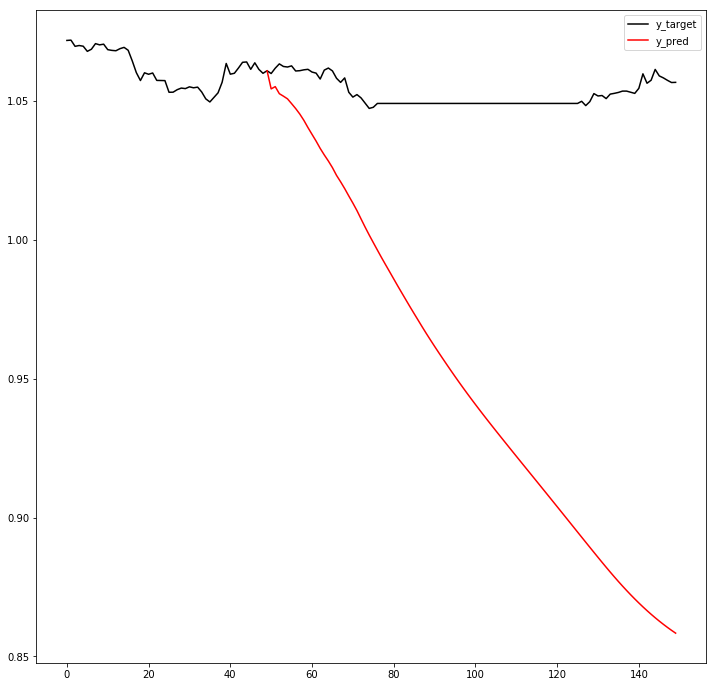

In [232]:
# Hago un test con una predicción realimentada
pn0.test_full_predictions()

### Red creada de forma automática

In [240]:
# Creo red neuronal por defecto. Carga datos de archivo csv y deja preparada para entrenamiento
pn1 = PredictiveNet.PredictiveNet('pn1',
                    loopback_window=24, 
                    forward_window=4, 
                    num_lstm_layer=3, 
                    num_lstm_cells=128, 
                    num_dense_layers=0,
                    num_dense_cells=0,
                    batch_size=32,
                    suffle_enable=True,
                    tvt_csv_file='EURUSD_H1.csv')

file "pn1_fitlog.csv" updated


Train on 71040 samples, validate on 17760 samples
Epoch 1/1
 - 83s - loss: 0.0021 - acc: 0.2482 - val_loss: 3.1282e-04 - val_acc: 0.2251


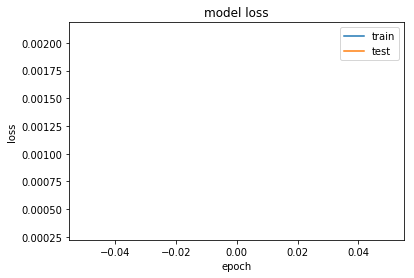

In [234]:
# Entreno la red
pn1.train_validate(1, True)

Model Loss:  4.153981892249561e-05
Model Accuracy: 19.34%


([1.06087,
  1.05987,
  1.06179,
  1.06334,
  1.06241,
  1.06221,
  1.06262,
  1.06078,
  1.06089,
  1.0612,
  1.06138,
  1.0604,
  1.06001,
  1.05788,
  1.06109,
  1.06184,
  1.06081,
  1.05816,
  1.05668,
  1.05829,
  1.05312,
  1.05138,
  1.05228,
  1.0511,
  1.04921,
  1.04731,
  1.04771,
  1.0491,
  1.0491,
  1.04987,
  1.04832,
  1.04975,
  1.05264,
  1.05179,
  1.05195,
  1.05084,
  1.05246,
  1.05273,
  1.05306,
  1.05354,
  1.05354,
  1.05311,
  1.05272,
  1.05454,
  1.05976,
  1.05637,
  1.05745,
  1.06134,
  1.05901,
  1.0583,
  1.05742,
  1.05663,
  1.05669,
  1.05701,
  1.05714,
  1.05623,
  1.05594,
  1.05706,
  1.05623,
  1.05669,
  1.05576,
  1.05824,
  1.06117,
  1.05869,
  1.06069,
  1.06141,
  1.06143,
  1.06161,
  1.06363,
  1.06175,
  1.06045,
  1.05955,
  1.05949,
  1.05993,
  1.05894,
  1.05969,
  1.05972,
  1.05936,
  1.05946,
  1.06055,
  1.06079,
  1.06075,
  1.06059,
  1.06008,
  1.05797,
  1.05935,
  1.06123,
  1.06086,
  1.06098,
  1.06239,
  1.06011,
  1.0

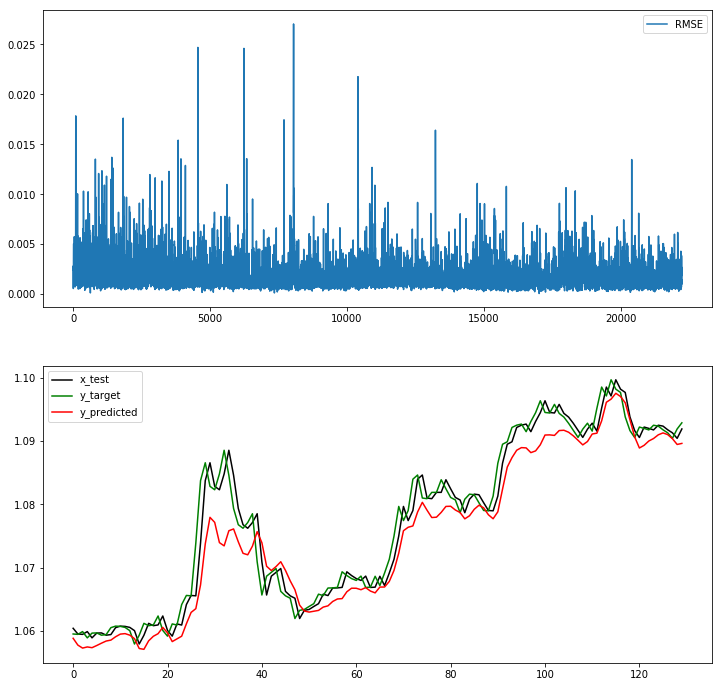

In [241]:
# Testeo la red
pn1.test_rmse()

[1.05623 1.05594 1.05706 1.05623] [1.055233  1.0570753 1.0566612 1.0553933]
[1.06141 1.06143 1.06161 1.06363] [1.0583689 1.060292  1.059837  1.0585645]
[1.05969 1.05972 1.05936 1.05946] [1.057391  1.059221  1.0587895 1.0575311]
[1.05935 1.06123 1.06086 1.06098] [1.0572598 1.059156  1.0587099 1.0573852]
[1.06563 1.06557 1.07391 1.08374] [1.0611587 1.0630683 1.0625817 1.061364 ]
[1.07935 1.07679 1.07623 1.07713] [1.0761217 1.0779951 1.0778021 1.0764446]
[1.06627 1.06557 1.06519 1.06199] [1.0709487 1.0727268 1.0729244 1.0711027]


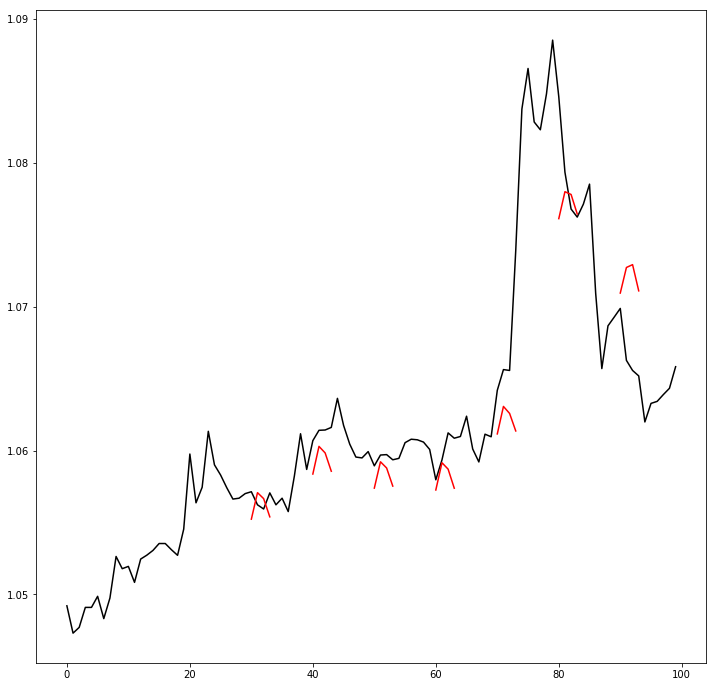

In [242]:
# Hago test con predicciones
pn1.test_with_predictions()

sample 1 de 100


C:\Users\raulm\workspace\keras_ml\PredictiveNet.py:785: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



sample 2 de 100
sample 3 de 100
sample 4 de 100
sample 5 de 100
sample 6 de 100
sample 7 de 100
sample 8 de 100
sample 9 de 100
sample 10 de 100
sample 11 de 100
sample 12 de 100
sample 13 de 100
sample 14 de 100
sample 15 de 100
sample 16 de 100
sample 17 de 100
sample 18 de 100
sample 19 de 100
sample 20 de 100
sample 21 de 100
sample 22 de 100
sample 23 de 100
sample 24 de 100
sample 25 de 100
sample 26 de 100
sample 27 de 100
sample 28 de 100
sample 29 de 100
sample 30 de 100
sample 31 de 100
sample 32 de 100
sample 33 de 100
sample 34 de 100
sample 35 de 100
sample 36 de 100
sample 37 de 100
sample 38 de 100
sample 39 de 100
sample 40 de 100
sample 41 de 100
sample 42 de 100
sample 43 de 100
sample 44 de 100
sample 45 de 100
sample 46 de 100
sample 47 de 100
sample 48 de 100
sample 49 de 100
sample 50 de 100
sample 51 de 100
sample 52 de 100
sample 53 de 100
sample 54 de 100
sample 55 de 100
sample 56 de 100
sample 57 de 100
sample 58 de 100
sample 59 de 100
sample 60 de 100
sampl

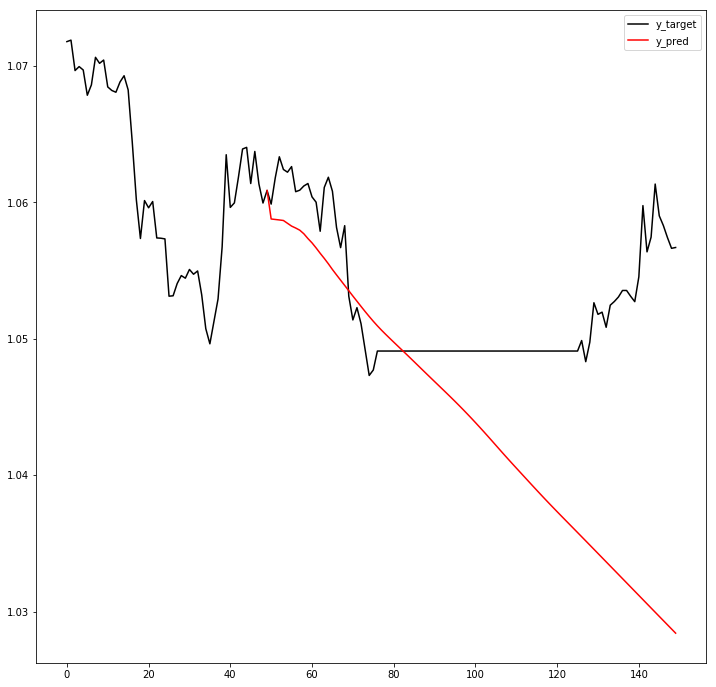

In [243]:
# Hago un test con una predicción realimentada
pn1.test_full_predictions()